In [2]:
import numpy as np
import cv2
import skimage
import matplotlib.pyplot as plt
%matplotlib inline

/home/dzyga/anaconda3/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


## Simple line plots

In [3]:
x = np.linspace(0, 10, 100)

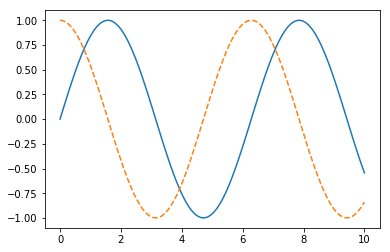

In [9]:
fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');

In [8]:
fig = plt.figure();

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'hELLO')

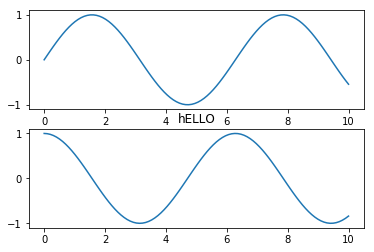

In [21]:
plt.figure()
# create a plot figure
# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(x, np.sin(x))
# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));
plt.title('hELLO')

Text(0.5, 1.0, 'hello')

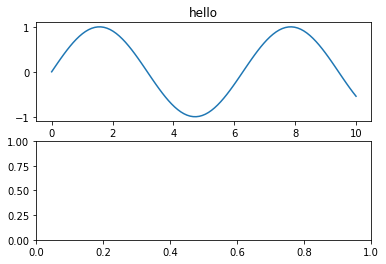

In [24]:
# First create a grid of plots
# ax will be an array of two Axes objects
fig, ax = plt.subplots(2)
ax[0].plot(x, np.sin(x))
ax[0].set_title('hello')

/home/dzyga/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GaussianProcess is deprecated; GaussianProcess was deprecated in version 0.18 and will be removed in 0.20. Use the GaussianProcessRegressor instead.
  warnings.warn(msg, category=DeprecationWarning)
/home/dzyga/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function l1_cross_distances is deprecated; l1_cross_distances was deprecated in version 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/dzyga/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function constant is deprecated; The function constant of regression_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/home/dzyga/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function cubic is deprec

/home/dzyga/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function cubic is deprecated; The function cubic of correlation_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/home/dzyga/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function cubic is deprecated; The function cubic of correlation_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/home/dzyga/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function cubic is deprecated; The function cubic of correlation_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/home/dzyga/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function cubic is deprecated; The function

/home/dzyga/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function cubic is deprecated; The function cubic of correlation_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/home/dzyga/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function cubic is deprecated; The function cubic of correlation_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/home/dzyga/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function cubic is deprecated; The function cubic of correlation_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/home/dzyga/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function cubic is deprecated; The function

/home/dzyga/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function cubic is deprecated; The function cubic of correlation_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/home/dzyga/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function cubic is deprecated; The function cubic of correlation_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/home/dzyga/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function cubic is deprecated; The function cubic of correlation_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/home/dzyga/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function cubic is deprecated; The function

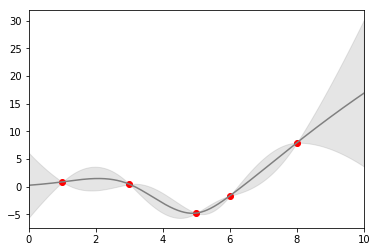

In [27]:
from sklearn.gaussian_process import GaussianProcess
# define the model and draw some data
model = lambda x: x * np.sin(x)
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)
# Compute the Gaussian process fit
gp = GaussianProcess(corr='cubic', theta0=1e-2, thetaL=1e-4, thetaU=1E-1,
random_start=100)
gp.fit(xdata[:, np.newaxis], ydata)
xfit = np.linspace(0, 10, 1000)
yfit, MSE = gp.predict(xfit[:, np.newaxis], eval_MSE=True)
dyfit = 2 * np.sqrt(MSE) # 2*sigma ~ 95% confidence region

plt.plot(xdata, ydata, 'or')
plt.plot(xfit, yfit, '-', color='gray')
plt.fill_between(xfit, yfit - dyfit, yfit + dyfit,
color='gray', alpha=0.2)
plt.xlim(0, 10);

/home/dzyga/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


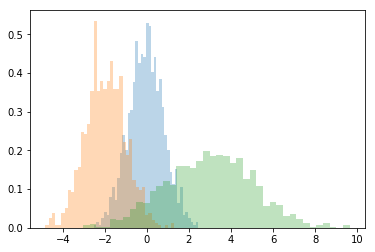

In [28]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)
kwargs = dict(histtype='stepfilled', alpha=0.3, normed=True, bins=40)
plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

## Images

In [29]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

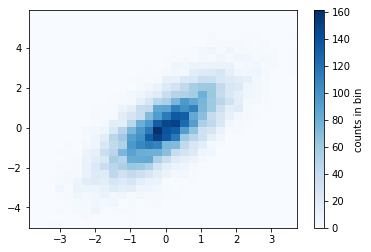

In [30]:
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

In [31]:
counts, xedges, yedges = np.histogram2d(x, y, bins=30)

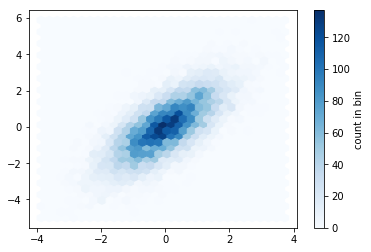

In [32]:
plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')

In [3]:
# Source of image
folder = '/home/dzyga/My/Python/Univer/Data/nice_images/'
fname = 'galaxies.jpeg'
file = folder + fname 

In [10]:
# Try different libraries for exporting and working wiht image
# I will use OpenCV
img = cv2.imread(file)
hsvimg = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
himg = hsvimg[:,:,0]
simg = hsvimg[:,:,1]
vimg = hsvimg[:,:,2]

In [9]:
# Now you try another way to load and show image

# your code is going to be here 

In [11]:
# function for arbitary number of image to show
def show_images(img_dict):  
    """from img_dict = {'title': image} input create a subplots
    Ex.: show_image('rgb' = img, 'hsv' = hsvimg, 'mask'= mask)  """
    N = len(img_dict)
    fig, ax = plt.subplots(1, N, figsize = (6, 10))
    i = 0
    for text, image in img_dict.items(): 
        ax[i].imshow(image)
        ax[i].set_title(text)
        ax[i].axis('off');
        i+=1
    plt.show()

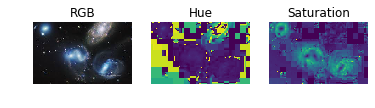

In [12]:
img_dict = {'RGB':img, 'Hue':himg, 'Saturation':simg}
show_images(img_dict)

In [ ]:
# Example

### Text in plots  

In [1]:
# Plot adjusments - toy example of dictionary usage
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

In [14]:
# Add labels to the plot
style = dict(size=10, color='gray')

# ax.text('2012-1-1', 3950, "New Year's Day", **style)

In [16]:
style

{'size': 10, 'color': 'gray'}

### Subplots 

/home/dzyga/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:17: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping, defaultdict


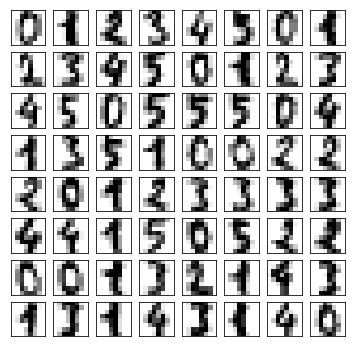

In [34]:
# load images of the digits 0 through 5 and visualize several of them
from sklearn.datasets import load_digits
digits = load_digits(n_class=6)
fig, ax = plt.subplots(8, 8, figsize=(6, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

## Seaborn plotting library

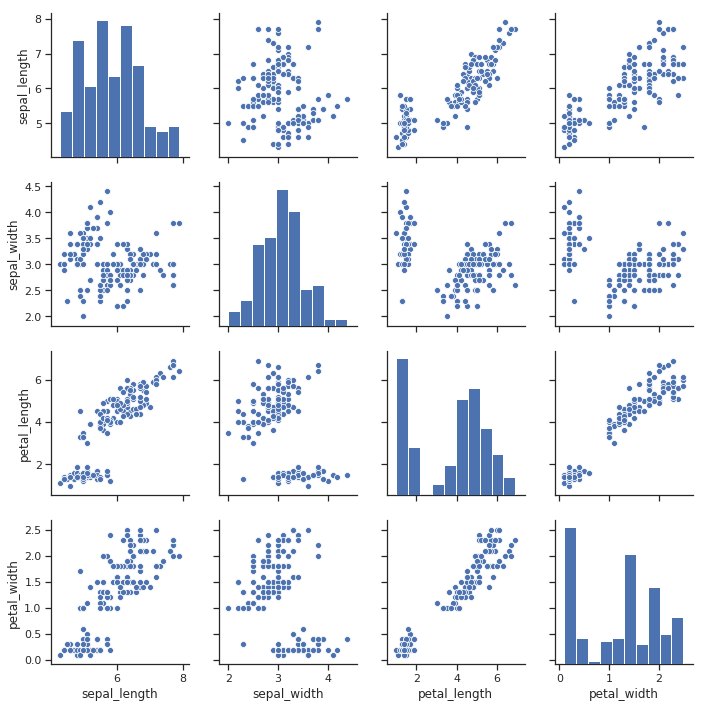

In [35]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)

iris = sns.load_dataset("iris")

g = sns.pairplot(iris)

In [36]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa
